<a href="https://colab.research.google.com/github/kasra-sal/Password_Strength/blob/main/Password_Stength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras 
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,BatchNormalization
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn import preprocessing, neighbors
import keras_tuner as kt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from keras.utils import plot_model
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

url = "https://raw.githubusercontent.com/kasra-sal/Password_Strength/main/data.csv"
data = pd.read_csv(url, error_bad_lines=False,chunksize=10000,iterator=True)
data = pd.concat(data,ignore_index=True)
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\n'
b'Skipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\n'
b'Skipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\n'
b'Skipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\n

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install -q -U keras-tuner
!pip install snapml

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


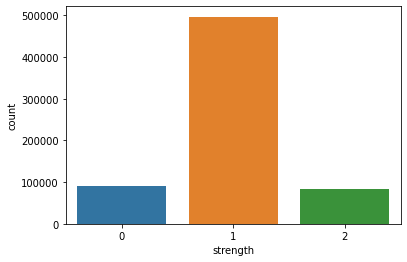

In [ ]:
sns.countplot(data['strength'])

In [96]:
weak = data[data['strength']==0]
medium = data[data['strength']==1]
strong = data[data['strength']==2]


def data_downsampling(x):
  downsample = resample(x,replace=True,n_samples=len(weak),random_state=42)
  return downsample 

medium_resample = data_downsampling(medium)
strong_resample = data_downsampling(strong)

data = pd.concat([weak,medium_resample,strong_resample])

# Data cleaning
data.isna().sum()

# Drop empty rows
data.dropna(inplace=True)


# Preparing data 
data['length'] = data['password'].str.len()
def createTokens(f):
    tokens = []
    for i in f:
        tokens.append(i)
    return tokens

# data preperation and Training/Testing split


X = np.array(data["password"])
y = np.array(data['strength'])

vectorizer = TfidfVectorizer(tokenizer=createTokens)
X = vectorizer.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train =X_train.toarray()
X_test = X_test.toarray()



list_of_pass = ['asjkgsSa!1@','R3C0V3R3NDL3SSa!','sasDddas','keisA!nF@#dy']
vectorized_pass = vectorizer.transform(list_of_pass)
vectorized_pass = vectorized_pass.toarray()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


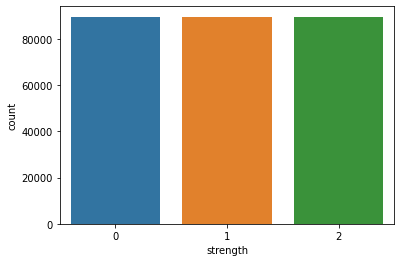

In [ ]:

sns.countplot(data['strength'])

In [97]:

class pipe_model():
  def __init__(self,X_train,y_train, X_test,y_test,pipe_filename,filename):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    self.filename = filename
    self.pipe_filename = pipe_filename
    self.model = self.pipe_filename.fit(self.X_train,self.y_train)

  def pipe_model(self):
    return self.model
  
  def model_score(self):
    score = self.pipe_filename.score(self.X_test,self.y_test)
    return(score*100)

  def predict(self):
    return self.model.predict(self.X_test)

  def model_save(self,filename):
    filename = f'{self.filename}.sav'
    pickle.dump(pipeline, open(filename, 'wb'))

  def model_load(self,filename):
    model = pickle.load(open(f'{self.filename}.sav', 'rb'))
    return model



class DNN_model():
  def __init__(self,epoch,max_epoch,batch_size,Flatten_shape,act_1,act_2,act_3,act_out,min_val,max_val):
    self.epoch = epoch
    self.max_epoch = max_epoch
    self.batch_size = batch_size
    self.Flatten_shape = Flatten_shape
    self.act_1 = act_1
    self.act_2 = act_2
    self.act_3 = act_3
    self.act_out = act_out
    self.min_val = min_val
    self.max_val = max_val
    self.DNN_optimizer
    self.DNN_manual_model
    self.DNN_best_estimate

  def DNN_optimizer(self,x):
    # Tune the number of units in the two hidden layers:
    unit_1 = x.Int('units_1', min_value = self.min_val, max_value = self.max_val, step = 32)
    unit_2 = x.Int('units_2', min_value = self.min_val, max_value = self.max_val, step = 32)
    unit_3 = x.Int('units_3', min_value = self.min_val, max_value = self.max_val, step = 32)

    model = Sequential([
        Flatten(input_shape= [self.Flatten_shape]),
        Dense(units = unit_1,activation=self.act_1),
        BatchNormalization(),
        Dense(units = unit_2,activation=self.act_2),
        BatchNormalization(),
        Dense(units = unit_3,activation=self.act_3),
        Dense(3,activation=self.act_out)
      ])
    # Tune the optimizer:
    x_optimizer = x.Choice('optimizer', ['Adam', 'RMSProp', 'SGD', 'Adagrad', 'Adamax'])
    model.compile(optimizer = x_optimizer,
                  loss ="sparse_categorical_crossentropy", 
                  metrics = ['accuracy'])
    return model

  def DNN_best_estimate(self):
    tuner = kt.Hyperband(self.DNN_optimizer, objective = 'val_accuracy',max_epochs = self.max_epoch, factor = 3, overwrite = True)
    tuner.search(X_train, y_train,validation_data=(X_test, y_test), verbose=1,batch_size=self.batch_size)
    optimized_model = tuner.get_best_hyperparameters(num_trials = 1)[0]
    model = tuner.hypermodel.build(optimized_model)
    history =  model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=self.epoch,verbose=1,batch_size=self.batch_size)
    #model.save("DNN_best_estimate")
    return history

  def DNN_manual_model(self):
      model = Sequential([
        Flatten(input_shape=[self.Flatten_shape]),
        Dense(416,activation=self.act_1),
        BatchNormalization(),
        Dense(128,activation=self.act_2),
        BatchNormalization(),
        Dense(100,activation=self.act_3),
        Dense(3,activation=self.act_out)
      ])
      model.compile(loss="sparse_categorical_crossentropy",
                    optimizer='Adam',
                    metrics=["accuracy"])

      history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=self.epoch, verbose=0,batch_size=self.batch_size)
      #model.save("DNN_manual_model")
      filename = 'DNN_best_estimate.sav'
      pickle.dump(model, open(filename, 'wb'))

      return history, model

  def DNN_score(self,model):
      test_score = model.evaluate(X_test,y_test,verbose=0,batch_size = 1000) 
      test_metric = model.metrics_names[1]
      text = print(f"Test {test_metric} is : {test_score[1]*100} \n")

  def DNN_graph_model(self,history):
        pd.DataFrame(history.history).plot(figsize=(8, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 1)
        plt.show()

  def DNN_predict(self,model,list_to_predict):
        predict = model.predict(list_to_predict,verbose=1)
        output = np.argmax((predict), axis = 1)
        return output

def confusionMatrix(y_test,y_pred,model):
    cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
    pcm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    pcm.plot()
    plt.show()

In [106]:
class pipe_model():
  def __init__(self,X_train,y_train,X_test,y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test  
    self.y_test = y_test

  def fit(self,pipe_filename):
    model = pipe_filename.fit(self.X_train,self.y_train)
    return model
  def model_score(self,model,X_test,y_test):
    score = model.score(self.X_test,self.y_test)
    return(score*100)

  def predict(self,model,X_test):
    return model.predict(X_test)

  def save(self,filename):
    model = self.model
    pickle.dump(model, open( f'{filename}.sav', 'wb'))

  def load(self,filename):
    model = pickle.load(open(f'{filename}.sav', 'rb'))
    return model
 

class ANN:
    def __init__(self, input_size, output_size):
        self.model = Sequential()
        self.input_size = input_size
        self.output_size = output_size


    def add_layer(self, units, activation, input_size=None):
        if input_size == True:
            self.model.add(Flatten(input_shape=[self.input_size]))
            self.model.add(Dense(units, activation=activation))
        else:
            self.model.add(Dense(units,activation=activation))
    def Batch_normalization(self):
        self.model.add(BatchNormalization())
        
    def compile(self, optimizer, loss, metrics):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def summary(self):
        return self.model.summary()

    def predict(self,model,list_to_predict):
        predict = model.predict(list_to_predict,verbose=0)
        output = np.argmax((predict), axis = 1)
        return output

    def model_getter(self):
      return self.model
   
    def fit(self, X_train, y_train, epochs, batch_size, validation_data=None):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

    def evaluate(self, x, y):
        return self.model.evaluate(x, y)

    def save(self, file_):
        self.model.save(file_)
    
    def load(self, file_):
        model = keras.models.load_model(file_)
        return model


class optimizer():
  def __init__(self,X_train,y_train,X_test,y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
  def optimize_ANN(self,epoch,max_epoch,batch_size,min_val,max_val,Flatten_shape,act_1,act_2,act_3,act_out):
    def DNN_optimizer(self,x):
      # Tune the number of units in the two hidden layers:
      unit_1 = x.Int('units_1', min_value = min_val, max_value = max_val, step = 32)
      unit_2 = x.Int('units_2', min_value = min_val, max_value = max_val, step = 32)
      unit_3 = x.Int('units_3', min_value = min_val, max_value = max_val, step = 32)

      model = Sequential([
          Flatten(input_shape= [Flatten_shape]),
          Dense(units = unit_1,activation=act_1),
          BatchNormalization(),
          Dense(units = unit_2,activation=act_2),
          BatchNormalization(),
          Dense(units = unit_3,activation=act_3),
          Dense(3,activation=act_out)
        ])
      # Tune the optimizer:
      x_optimizer = x.Choice('optimizer', ['Adam', 'RMSProp', 'SGD', 'Adagrad', 'Adamax'])
      model.compile(optimizer = x_optimizer,
                    loss ="sparse_categorical_crossentropy", 
                    metrics = ['accuracy'])
      return model

    tuner = kt.Hyperband(DNN_optimizer, objective = 'val_accuracy',max_epochs = max_epoch, factor = 3, overwrite = True)
    tuner.search(X_train, y_train,validation_data=(X_test, y_test), verbose=1,batch_size=batch_size)
    optimized_model = tuner.get_best_hyperparameters(num_trials = 1)[0]
    model = tuner.hypermodel.build(optimized_model)
    history =  model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=epoch,verbose=1,batch_size=batch_size)
    #model.save("DNN_best_estimate")
    return history
  def DCT_optimizer(self,model,criterion,max_depth,sample_leaf,sample_split):
    pipe = Pipeline(steps=[("model", model)])
    param = {"model__criterion":criterion,
            "model__max_depth":max_depth,
            "model__min_samples_split":sample_split,
            "model__min_samples_leaf":sample_leaf,
            }
    _grid = GridSearchCV(estimator=pipe, param_grid=param, verbose=True)
    pipe.get_params().keys()
    _grid.fit(X_train,y_train)

    return _grid.best_estimator_

  def RFT_optimizer(self,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators):
    model = RandomForestClassifier()

    param = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
    }

    grid_search = GridSearchCV(model, param_grid = param,cv=3, verbose=True)
    grid_search.fit(X_train,y_train)
    return grid_search.best_estimator_
  

def confusionMatrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    pcm = ConfusionMatrixDisplay(confusion_matrix=cm)
    pcm.plot()
    plt.show()



In [ ]:
model = ANN(143,3)
model.add_layer(416,'tanh',True)
model.add_layer(128,'tanh')
model.Batch_normalization()
model.add_layer(100,'tanh')
model.Batch_normalization()
model.add_layer(3,'sigmoid')

model.summary()
model.compile('Adam','sparse_categorical_crossentropy',['accuracy'])
model.fit(X_train, y_train, 2, 1000, validation_data=(X_test, y_test))
y_pred = model.y_pred(X_test)
confusionMatrix(y_test,y_pred)
model.save("ANN_model")

In [ ]:
loaded = ANN(143,3)
model = loaded.load("ANN_model")
model.summary()
pred = model.predict(vectorized_pass)
model.evaluate(X_test,y_test)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 143)               0         
                                                                 
 dense_44 (Dense)            (None, 416)               59904     
                                                                 
 dense_45 (Dense)            (None, 128)               53376     
                                                                 
 batch_normalization_24 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_46 (Dense)            (None, 100)               12900     
                                                                 
 batch_normalization_25 (Bat  (None, 100)              400       
 chNormalization)                                    

[0.048590172082185745, 0.9851916432380676]

In [ ]:
pred = model.predict(vectorized_pass)
model.evaluate(X_test,y_test)

In [ ]:
clf_name = ['RandomForestClassifier','DecisionTreeClassifier','XGBClassifier']
clf__ = []
clf__.append(RandomForestClassifier(max_depth=61,
                                    n_jobs=-1))
clf__.append(DecisionTreeClassifier(max_depth=61))
clf__.append(XGBClassifier(
    learning_rate=0.9,
    n_estimators=15,
    objective="multi:softprob",
    nthread=3))

pipeline = Pipeline([
    ('clf', RandomForestClassifier())])



for i in range(len(clf__)):
  model = pipe_model(X_train,y_train,X_test,y_test)
  pipeline.set_params(clf = clf__[i])
  print(f'\n{clf_name[i]}\n')
  accuracy  = model.model_score(X_test,y_test)
  print(accuracy)
  model.save_model(clf_name[i])
  y_pred = model.predict(X_test)
  confusionMatrix(y_test,y_pred)


model = ANN(143,3)
model.add_layer(416,'tanh',True)
model.add_layer(128,'tanh')
model.Batch_normalization()
model.add_layer(100,'tanh')
model.Batch_normalization()
model.add_layer(3,'sigmoid')

model.compile('Adam','sparse_categorical_crossentropy',['accuracy'])
model.fit(X_train, y_train, 50, 1000, validation_data=(X_test, y_test))
y_pred = model.y_pred(X_test)
confusionMatrix(y_test,y_pred)
model.save("ANN_model")



RandomForestClassifier

95.76001932331246

DecisionTreeClassifier

90.7972724401256

XGBClassifier

91.28407127329481
Epoch 1/50
216/216 [==============================] - 5s 18ms/step - loss: 0.4785 - accuracy: 0.8027 - val_loss: 0.7463 - val_accuracy: 0.5896
Epoch 2/50
216/216 [==============================] - 4s 17ms/step - loss: 0.3645 - accuracy: 0.8589 - val_loss: 0.6299 - val_accuracy: 0.7180
Epoch 3/50
216/216 [==============================] - 4s 17ms/step - loss: 0.2874 - accuracy: 0.8943 - val_loss: 0.7432 - val_accuracy: 0.7203
Epoch 4/50
216/216 [==============================] - 4s 18ms/step - loss: 0.2248 - accuracy: 0.9192 - val_loss: 0.5529 - val_accuracy: 0.7724
Epoch 5/50
216/216 [==============================] - 5s 22ms/step - loss: 0.1858 - accuracy: 0.9350 - val_loss: 0.4218 - val_accuracy: 0.8274
Epoch 6/50
216/216 [==============================] - 4s 18ms/step - loss: 0.1586 - accuracy: 0.9448 - val_loss: 0.1825 - val_accuracy: 0.9348
Epoch 7/50
216/216 [===

In [ ]:
for i in range(len(clf_name)):
  model = pickle.load(clf_name[i])
  

In [107]:


for i in  range(len(clf_name)):
  pipeModel = pipe_model(X_train,y_train,X_test,y_test)
  model = pipeModel.load(clf_name[i])
  predict = model.predict(vectorized_pass)
  print("\n",clf_name[i],"\n")
  print(predict)

ANNmodel = ANN(143,3)
model = ANNmodel.load("ANN_model")
print("\nArtificial Neural Network\n")
predict  = ANNmodel.predict(model,vectorized_pass)

print(predict)






 RandomForestClassifier 

[2 2 0 2]

 DecisionTreeClassifier 

[2 2 1 2]

 XGBClassifier 

[2 2 0 2]

Artificial Neural Network

[1 2 0 2]


In [ ]:
model = DecisionTreeClassifier()
pipe = Pipeline(steps=[
                       ("model",model)])

criterion = ['gini','entropy']
max_depth = [i for i in range(1,100,20)]
samp_leaf = [1,2]
samp_split = [2,3]
param = {"model__criterion":criterion,
         "model__max_depth":max_depth,
         "model__min_samples_split":samp_split,
         "model__min_samples_leaf":samp_leaf,
         }
_grid = GridSearchCV(estimator=pipe, param_grid=param, verbose=True)
pipe.get_params().keys()
_grid.fit(X_train,y_train)
_grid.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Pipeline(steps=[('model', DecisionTreeClassifier(max_depth=61))])

In [ ]:
model = RandomForestClassifier()

param = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3,5, 10],
 'n_estimators': [2,3,5,10]
}

grid_search = GridSearchCV(model, param_grid = param,cv=3, verbose=True)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_